In [139]:
import numpy as np 
import pandas as pd 
import datetime

import numpy
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.datasets import reuters
from keras.models import Sequential
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense,LSTM,Embedding
from keras.layers import Dense, LSTM, Embedding
from keras.preprocessing import sequence
from keras.utils import np_utils

seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)
from keras.callbacks import ModelCheckpoint, EarlyStopping
import os

In [140]:
#print(items_frm.head(3))             # 아이템, 카테고리 라벨링
#print('---------')
#print(sample_submission_frm.head(3)) # 제출양식
#print(item_categories_frm.head(3))   # 카테고리 이름, 라벨링
#print(sales_train_frm.head(3))       #
#print(shops_frm.head(3))             # 상점 라벨링
#test_frm             # 

In [141]:
#제출 형식 예제
sample_submission = pd.read_csv('data/sample_submission.csv')
sample_submission
#달 단위 결과

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5
...,...,...
214195,214195,0.5
214196,214196,0.5
214197,214197,0.5
214198,214198,0.5


In [142]:
shops = pd.read_csv('data/shops.csv')
shops

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4
5,"Вологда ТРЦ ""Мармелад""",5
6,"Воронеж (Плехановская, 13)",6
7,"Воронеж ТРЦ ""Максимир""",7
8,"Воронеж ТРЦ Сити-Парк ""Град""",8
9,Выездная Торговля,9


In [143]:
items = pd.read_csv('data/items.csv')
items

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
...,...,...,...
22165,"Ядерный титбит 2 [PC, Цифровая версия]",22165,31
22166,Язык запросов 1С:Предприятия [Цифровая версия],22166,54
22167,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...,22167,49
22168,Яйцо для Little Inu,22168,62


In [144]:
sales_train = pd.read_csv('data/sales_train.csv')
sales_train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


In [145]:
print(type(sales_train.date[0]) , sales_train.date[0])
sales_train.info()

<class 'str'> 02.01.2013
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [146]:
#for i in range(len(sales_train)):
#    sales_train.date[i] = datetime.datetime.strptime(sales_train.date[i],'%d.%m.%Y')

In [147]:
sales_train.date=sales_train.date.apply(
    lambda x:datetime.datetime.strptime(x, '%d.%m.%Y'))

In [148]:
print(type(sales_train.date[0]) , sales_train.date[0])

<class 'pandas._libs.tslibs.timestamps.Timestamp'> 2013-01-02 00:00:00


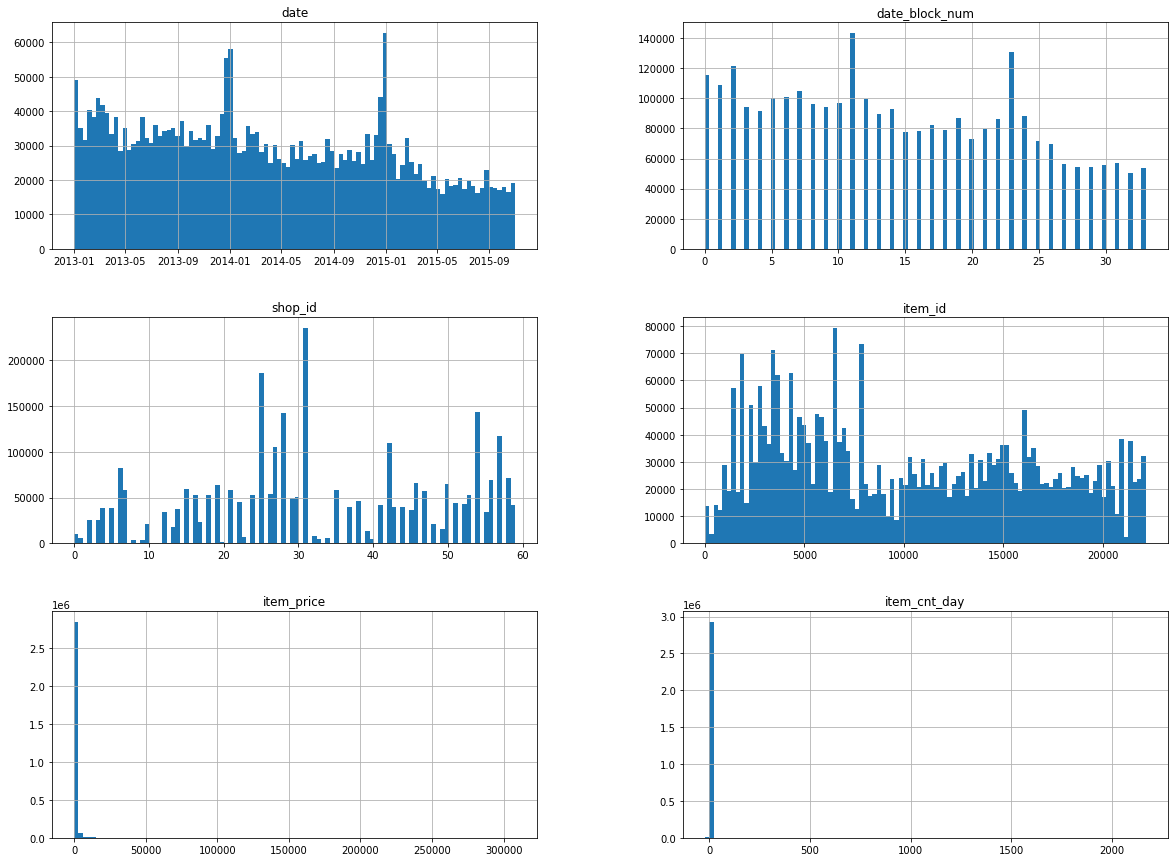

In [149]:
import matplotlib.pyplot as plt

sales_train.hist(bins = 100, figsize = (20,15))
plt.show()

In [12]:
pd.plotting.scatter_matrix(sales_train, figsize = (10,10))
plt.show()

KeyboardInterrupt: 

In [150]:
sales_train['price_hap'] = sales_train['item_price'] * sales_train['item_cnt_day']

In [151]:
daily_sales = sales_train.groupby('date', as_index=False)['price_hap'].sum()
store_daily_sales = sales_train.groupby(['shop_id', 'date'], as_index=False)['price_hap'].sum()
item_daily_sales = sales_train.groupby(['item_id', 'date'], as_index=False)['price_hap'].sum()

Text(0, 0.5, 'Sales')

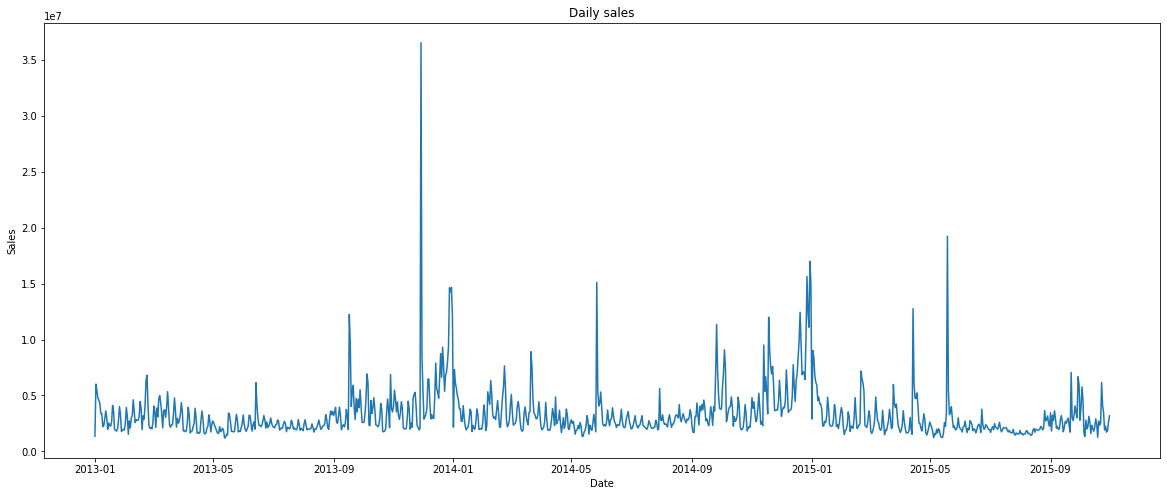

In [152]:
# 일별 총 판매량
plt.figure(figsize=(20,8))
plt.plot(daily_sales['date'],daily_sales['price_hap'])
plt.title('Daily sales')
plt.xlabel('Date')
plt.ylabel('Sales')

Text(0, 0.5, 'Sales')

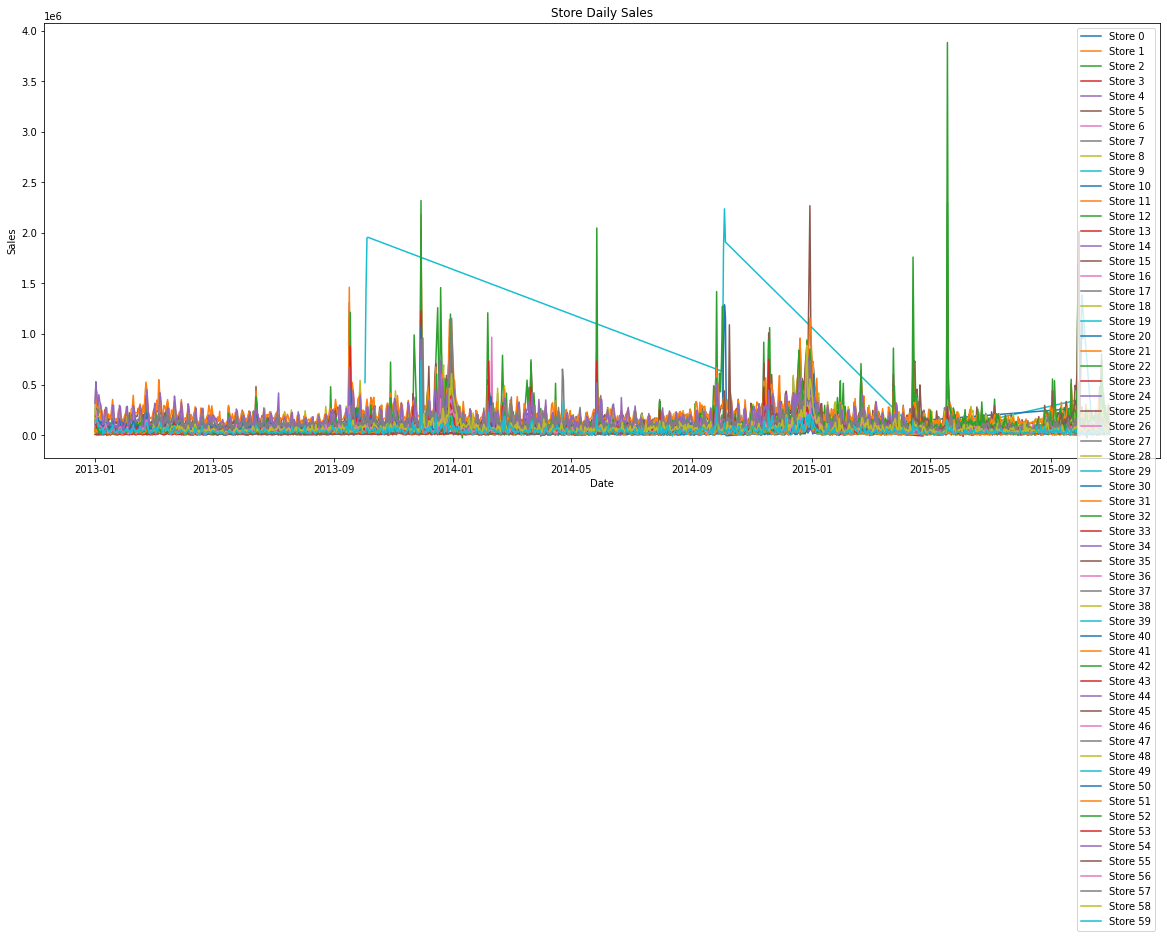

In [153]:
# 일별, Store별 총 판매량
plt.figure(figsize=(20,8))

for i in range(0,60) :
    temp = store_daily_sales[store_daily_sales.shop_id==i]
    plt.plot(temp['date'],temp['price_hap'], label = 'Store %d' % i)

plt.legend()
plt.title('Store Daily Sales')
plt.xlabel('Date')
plt.ylabel('Sales')

KeyboardInterrupt: 

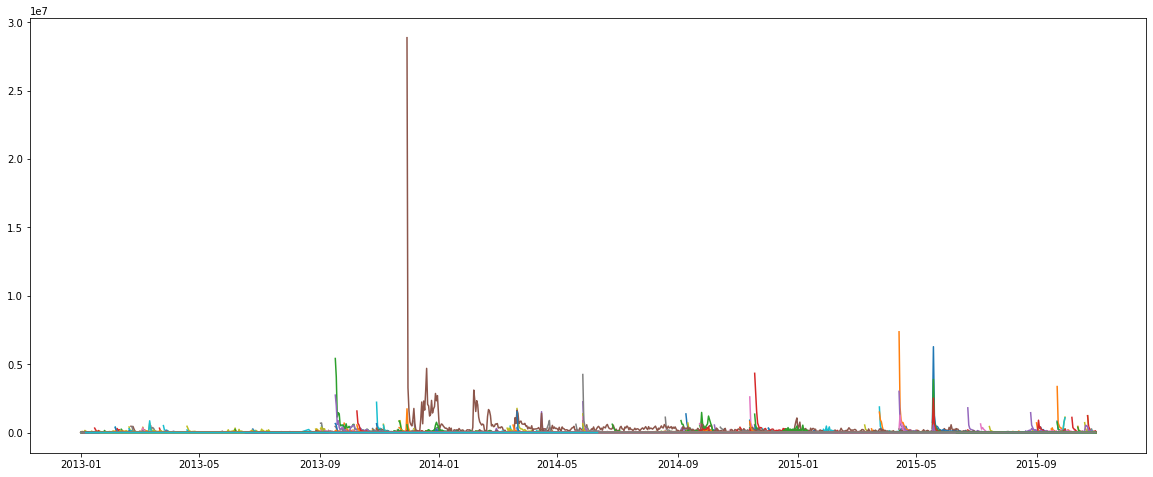

In [21]:
# 일별, Item별 총 판매량

plt.figure(figsize=(20,8))

for i in range(0,22170) :
    temp = item_daily_sales[item_daily_sales.item_id==i]
    plt.plot(temp['date'],temp['price_hap'], label = 'Item %d' %i)

# plt.legend()
plt.title('Item Daily Sales')
plt.xlabel('Date')
plt.ylabel('Sales')

In [154]:
def series_to_supervised(data, window=1, lag=1, dropnan=True):
    cols, names = list(), list()
    # Input sequence (t-n, ... t-1)
    for i in range(window, 0, -1):
        cols.append(data.shift(i))
        names += [('%s(t-%d)' % (col, i)) for col in data.columns]
    # Current timestep (t=0)
    cols.append(data)
    names += [('%s(t)' % (col)) for col in data.columns]
    # Target timestep (t=lag)
    cols.append(data.shift(-lag))
    names += [('%s(t+%d)' % (col, lag)) for col in data.columns]
    # Put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # Drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
    
train_gp = sales_train.sort_values('date').groupby(["date_block_num","shop_id","item_id"], as_index=False)
train_gp = train_gp.agg({'price_hap':['mean']})
train_gp.columns = ['date_block_num', 'store_id', 'item_id', 'price_hap']

window = 33
lag_size =1
lag=lag_size
series = series_to_supervised(train_gp.drop('price_hap', axis=1), window=window, lag=lag)

last_item = 'item_id(t-%d)' % window
last_store = 'store_id(t-%d)' % window
series = series[(series['store_id(t)'] == series[last_store])]
series = series[(series['item_id(t)'] == series[last_item])]

columns_to_drop = [('%s(t+%d)' % (col, lag)) for col in ['item_id', 'store_id']]
for i in range(window, 0, -1):
    columns_to_drop += [('%s(t-%d)' % (col, i)) for col in ['item_id', 'store_id']]
series.drop(columns_to_drop, axis=1, inplace=True)
series.drop(['item_id(t)', 'store_id(t)'], axis=1, inplace=True)

In [155]:
train_gp

,date_block_num,store_id,item_id,price_hap
0,0,0,32,331.5
1,0,0,33,347.0
2,0,0,35,247.0
3,0,0,43,221.0
4,0,0,51,128.5
...,...,...,...,...
1609119,33,59,22087,238.0
1609120,33,59,22088,119.0
1609121,33,59,22091,179.0
1609122,33,59,22100,629.0


In [156]:
pd.set_option('display.max_columns', 15)
series

,date_block_num(t-33),date_block_num(t-32),date_block_num(t-31),date_block_num(t-30),date_block_num(t-29),date_block_num(t-28),date_block_num(t-27),...,date_block_num(t-5),date_block_num(t-4),date_block_num(t-3),date_block_num(t-2),date_block_num(t-1),date_block_num(t),date_block_num(t+1)


In [117]:
from sklearn.model_selection import train_test_split

labels_col = 'price_hap(t+1)'
labels = series['price_hap(t+1)']
series = series.drop(labels_col, axis=1)

X_train, X_valid, Y_train, Y_valid = train_test_split(series, labels.values, test_size=0.3, random_state=0)

ValueError: With n_samples=0, test_size=0.3 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [ ]:
print(X_train, X_valid, Y_train, Y_valid)

In [ ]:
print(X_train.shape, X_valid.shape ,Y_train.shape, Y_valid.shape)

In [ ]:
from tensorflow.keras import optimizers

epochs = 40
batch = 256
lr = 0.0003
adam = optimizers.Adam(lr)

model_mlp = Sequential()
model_mlp.add(Dense(100, activation='relu', input_dim=X_train.shape[1]))
model_mlp.add(Dense(1))
model_mlp.compile(loss='mse', optimizer=adam)

In [118]:
mlp_history = model_mlp.fit(X_train.values, Y_train, validation_data=(X_valid.values, Y_valid), epochs=epochs, verbose=2)

Epoch 1/40


KeyboardInterrupt: 

In [76]:
mlp_train_pred = model_mlp.predict(X_train.values)
mlp_valid_pred = model_mlp.predict(X_valid.values)

Y_train_ = pd.DataFrame({'y_true': Y_train, 'y_pred': mlp_train_pred.reshape(mlp_train_pred.shape[0],)}).set_index(X_train.index).sort_index()
Y_train_ = pd.merge(Y_train_, train_gp,
         left_index=True, right_index=True,
         how='left')

Y_valid_ = pd.DataFrame({'y_true': Y_valid, 'y_pred': mlp_valid_pred.reshape(mlp_valid_pred.shape[0],)}).set_index(X_valid.index).sort_index()
Y_valid_ = pd.merge(Y_valid_, train_gp,
         left_index=True, right_index=True,
         how='left')

In [77]:
from sklearn import metrics


def scoring(y_true, y_pred):
    r2 = round(metrics.r2_score(y_true, y_pred) * 100, 3)
    #     mae = round(metrics.mean_absolute_error(y_true, y_pred),3)
    corr = round(np.corrcoef(y_true, y_pred)[0, 1], 3)
    mape = round(
        metrics.mean_absolute_percentage_error(y_true, y_pred) * 100, 3)
    rmse = round(metrics.mean_squared_error(y_true, y_pred, squared=False), 3)

    df = pd.DataFrame({
        'R2': r2,
        "Corr": corr,
        "RMSE": rmse,
        "MAPE": mape
    },
                      index=[0])
    return df

In [81]:
scoring(Y_train_.y_true, Y_train_.y_pred)

,R2,Corr,RMSE,MAPE
0,9.664,0.311,2910.049,6.403474e+17


In [79]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')
    
def MinMax(y_true, y_pred, m="min") :
    if(m == "min") :
        return min(min(y_true),min(y_pred)) -2
    else :
        return max(max(y_true),max(y_pred)) +2
        
def myGraph(temp, title) :
    fig, axs = plt.subplots(1,2,figsize=(20,5), gridspec_kw={'width_ratios': [2.5, 1]})
    axs[0].plot(temp.date, temp.y_true, label = "Original")
    axs[0].plot(temp.date, temp.y_pred, label = " Predicted")
    axs[0].legend(loc='upper right')
    axs[0].title.set_text(title)
    axs[0].set_xlabel("Date")
    axs[0].set_ylabel("Sales")


    axs[1].plot(temp.y_true,temp.y_pred,'.')
    plt.xlim(MinMax(temp.y_true,temp.y_pred),MinMax(temp.y_true,temp.y_pred,"max"))
    plt.ylim(MinMax(temp.y_true,temp.y_pred),MinMax(temp.y_true,temp.y_pred,"max"))
    abline(1,0)
    plt.title(title)
    plt.xlabel("Original")
    plt.ylabel("Predicted")

In [98]:
Y_valid_['item_id'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33],
      dtype=int64)

In [94]:
temp = Y_valid_.loc[(Y_valid_.store_id == 60) & (Y_valid_.item_id == 22170),].sort_values('date')
print(temp)

Empty DataFrame
Columns: [y_true, y_pred, item_id, store_id, date, price_hap]
Index: []


In [95]:
scoring(temp.y_true, temp.y_pred)

ValueError: Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.

ValueError: min() arg is an empty sequence

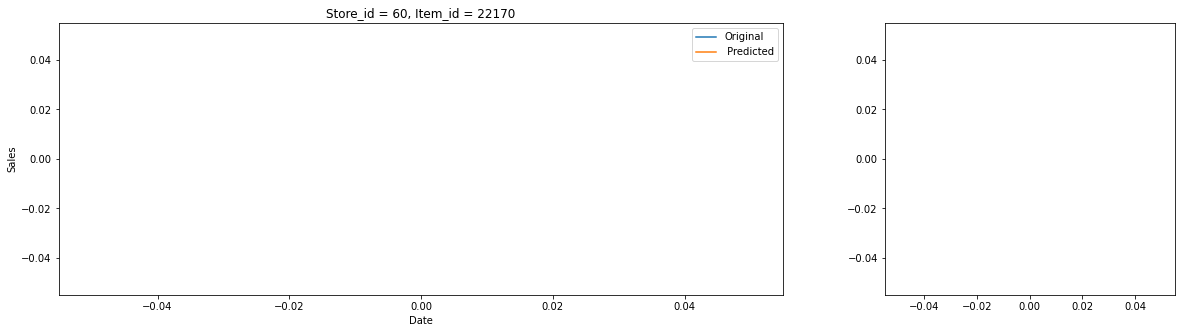

In [87]:
myGraph(temp, 'Store_id = %d, Item_id = %d' % (60,22170))

In [112]:
sales_train_c = sales_train.copy()

In [113]:
sales_train_c.drop(['date','item_price', 'item_cnt_day','price_hap'],axis =1, inplace=True)

In [114]:
sales_train_c

,date_block_num,shop_id,item_id
0,0,59,22154
1,0,25,2552
2,0,25,2552
3,0,25,2554
4,0,25,2555
...,...,...,...
2935844,33,25,7409
2935845,33,25,7460
2935846,33,25,7459
2935847,33,25,7440


In [123]:
from sklearn.model_selection import train_test_split

y = sales_train['price_hap']
X = sales_train_c.copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

print(X_train.shape, X_test.shape ,y_train.shape, y_test.shape)
print(X , y)

(2055094, 3) (880755, 3) (2055094,) (880755,)
         date_block_num  shop_id  item_id
0                     0       59    22154
1                     0       25     2552
2                     0       25     2552
3                     0       25     2554
4                     0       25     2555
...                 ...      ...      ...
2935844              33       25     7409
2935845              33       25     7460
2935846              33       25     7459
2935847              33       25     7440
2935848              33       25     7460

[2935849 rows x 3 columns] 0           999.00
1           899.00
2          -899.00
3          1709.05
4          1099.00
            ...   
2935844     299.00
2935845     299.00
2935846     349.00
2935847     299.00
2935848     299.00
Name: price_hap, Length: 2935849, dtype: float64


In [116]:
#month_sales_data=sales_train.groupby(["date_block_num","shop_id","item_id"]).agg({"date":["min",'max'],"item_price":"mean","item_cnt_day":"sum", "price_hap":"sum"})

In [117]:
#month_sales_data

In [118]:
#month_sales_data_c = month_sales_data.copy()
#month_sales_data_c.drop(['item_price', 'item_cnt_day','price_hap'],axis =1, inplace=True)

In [119]:
#month_sales_data_c.drop(['date'],axis =1, inplace=True)

In [120]:
#from sklearn.model_selection import train_test_split

#y = month_sales_data['price_hap']
#X = month_sales_data_c.copy()

#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

#print(y)
#print(y_test)

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

model = Sequential()
model.add(Dense(9, input_dim=3, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error',
              optimizer='adam')

# 모델 저장 폴더 만들기
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"

# 모델 업데이트 및 저장
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

# 학습 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor='loss', patience=40)

model.fit(X_train, y_train, epochs=10000, batch_size=10)

# 예측 값과 실제 값의 비교
Y_prediction = model.predict(X_test).flatten()
for i in range(10):
    label = Y_test[i]
    prediction = Y_prediction[i]
    print("실제: {:.3f}, 예상: {:.3f}".format(label, prediction))

from sklearn.metrics import r2_score
r2_y_predict = r2_score(y_test, Y_prediction)
print('R2 : ', r2_y_predict)

Epoch 1/10000
205510/205510 [==============================] - 119s 579us/step - loss: 33541458.0000
Epoch 2/10000
  1768/205510 [..............................] - ETA: 2:07 - loss: 13807207.0000

KeyboardInterrupt: 